<a href="https://colab.research.google.com/github/shirinlatifi/pe-project/blob/master/OilVisco_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn as sk
%matplotlib inline

In [2]:
import numpy as np
from random import randint
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler

In [3]:
df = pd.read_excel('oil visco.xlsx')

In [4]:
df

,T,P,Visco
0,266.0,NaN,0.100
1,325.0,NaN,0.100
2,325.0,NaN,0.200
3,212.0,NaN,0.200
4,258.0,3524.0,0.289
...,...,...,...
490,145.0,NaN,220.000
491,122.0,NaN,220.000
492,132.1,NaN,243.500
493,122.0,NaN,980.000


In [5]:
df['P'] = df['P'].fillna(df['P'].mean())

In [6]:
df['T'] = df['T'].fillna(df['T'].mean())

In [7]:
# def fillnanP(col):
#     if pd.isnull(col):
#       return (df['P']!=np.NAN).mean()
#     else:
#       return col

In [8]:
# def fillnanT(col):
#     if pd.isnull(col):
#       return (df['T']!=np.NAN).mean()
#     else:
#       return col

In [9]:
# df['P'] = df['P'].apply(fillnanP)

In [10]:
# df['T'] = df['T'].apply(fillnanT)

In [11]:
df.dropna(inplace=True)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 495 entries, 0 to 494
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   T       495 non-null    float64
 1   P       495 non-null    float64
 2   Visco   495 non-null    float64
dtypes: float64(3)
memory usage: 11.7 KB


In [13]:
df.corr()

,T,P,Visco
T,1.000000,0.020013,-0.091610
P,0.020013,1.000000,-0.005034
Visco,-0.091610,-0.005034,1.000000


In [14]:
df.corr()['Visco']

T       -0.091610
P       -0.005034
Visco    1.000000
Name: Visco, dtype: float64

<Axes: xlabel='P', ylabel='Visco'>

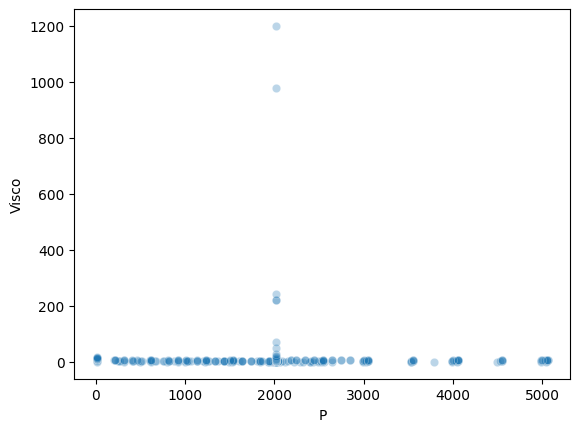

In [15]:
sns.scatterplot(data=df, x='P', y='Visco', alpha=0.3)

<Axes: xlabel='T', ylabel='Visco'>

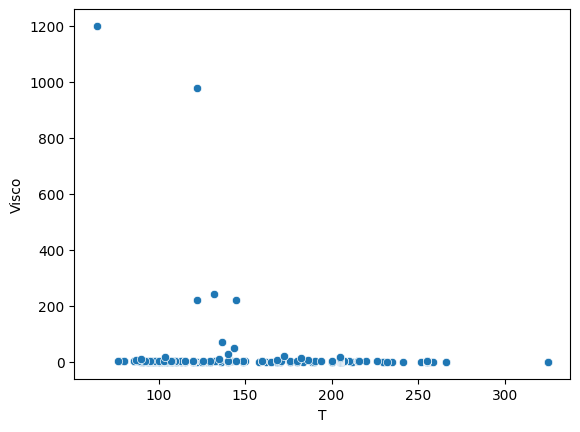

In [16]:
sns.scatterplot(data=df, x='T', y='Visco')

<Axes: xlabel='T', ylabel='P'>

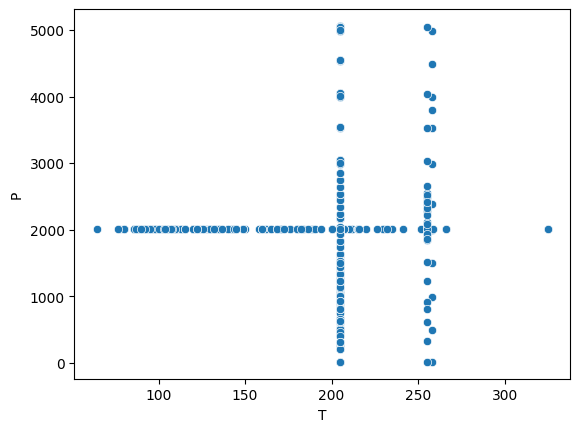

In [17]:
sns.scatterplot(data=df, x='T', y='P')

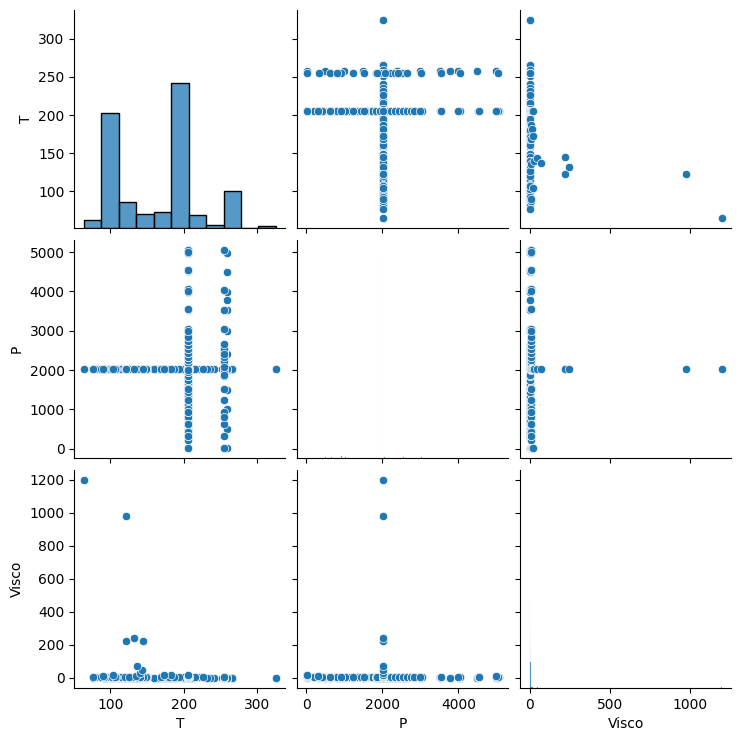

In [18]:
sns.pairplot(df)

#train test split

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train,X_test, y_train, y_test = train_test_split(df.drop('Visco', axis=1), df['Visco'], test_size=0.1, random_state=100)

In [21]:
scaler = MinMaxScaler(feature_range=(0,1))
X_train =  scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
y_train =  scaler.fit_transform(np.array(y_train).reshape(-1,1))
y_test =  scaler.fit_transform(np.array(y_test).reshape(-1,1))


In [22]:
y_train.max()

0.9999999999999999

In [23]:
y_test.max()

0.9999999999999999

In [24]:
X_train.max()

0.9999999999999999

In [25]:
X_train.min()

0.0

In [26]:
X_test.max()

0.9980179573068003

In [27]:
X_test.min()

0.0

# keras modeling

In [28]:
import scipy as sc

In [29]:
import tensorflow as tf

In [30]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy

In [31]:
# help(Sequential)

# creat first hidden layer

In [32]:
model = Sequential([
    Dense(units=16, input_shape=(2,), activation='relu'),
    # Dropout(0.2), # Adding dropout regularization
    Dense(units=32, activation='relu'),
    # Dropout(0.2),
    Dense(units=2, activation='softmax'),
     Dense(units=1)
])

In [33]:
model

In [34]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                48        
                                                                 
 dense_1 (Dense)             (None, 32)                544       
                                                                 
 dense_2 (Dense)             (None, 2)                 66        
                                                                 
 dense_3 (Dense)             (None, 1)                 3         
                                                                 
Total params: 661
Trainable params: 661
Non-trainable params: 0
_________________________________________________________________


#Getting Model Ready To Fit

In [35]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='mean_squared_error',
              metrics=['accuracy'])

#Fitting The Model

In [36]:
model.fit(x=X_train,
          y=y_train,
          batch_size=300,
          validation_split=0.1,
          epochs=1000,
          #shuffle=True,
          verbose=2)

Epoch 1/1000
2/2 - 1s - loss: 0.0972 - accuracy: 0.0050 - val_loss: 0.0934 - val_accuracy: 0.0000e+00 - 1s/epoch - 708ms/step
Epoch 2/1000
2/2 - 0s - loss: 0.0923 - accuracy: 0.0050 - val_loss: 0.0889 - val_accuracy: 0.0000e+00 - 41ms/epoch - 20ms/step
Epoch 3/1000
2/2 - 0s - loss: 0.0876 - accuracy: 0.0050 - val_loss: 0.0846 - val_accuracy: 0.0000e+00 - 36ms/epoch - 18ms/step
Epoch 4/1000
2/2 - 0s - loss: 0.0830 - accuracy: 0.0050 - val_loss: 0.0804 - val_accuracy: 0.0000e+00 - 36ms/epoch - 18ms/step
Epoch 5/1000
2/2 - 0s - loss: 0.0785 - accuracy: 0.0050 - val_loss: 0.0763 - val_accuracy: 0.0000e+00 - 34ms/epoch - 17ms/step
Epoch 6/1000
2/2 - 0s - loss: 0.0741 - accuracy: 0.0050 - val_loss: 0.0724 - val_accuracy: 0.0000e+00 - 35ms/epoch - 17ms/step
Epoch 7/1000
2/2 - 0s - loss: 0.0698 - accuracy: 0.0050 - val_loss: 0.0686 - val_accuracy: 0.0000e+00 - 40ms/epoch - 20ms/step
Epoch 8/1000
2/2 - 0s - loss: 0.0657 - accuracy: 0.0050 - val_loss: 0.0649 - val_accuracy: 0.0000e+00 - 36ms/epo

<Axes: >

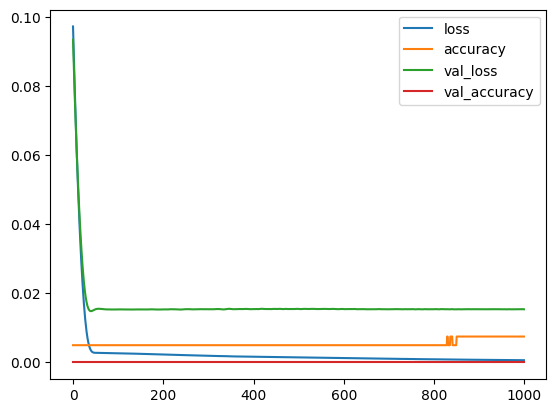

In [37]:
pd.DataFrame(model.history.history).plot()

# predict

In [38]:
predictions = model.predict(x=X_test, batch_size=100, verbose=2)

1/1 - 0s - 101ms/epoch - 101ms/step


In [39]:
predictions

array([[ 0.00234027],
       [ 0.00270621],
       [ 0.00531966],
       [-0.00082625],
       [ 0.0085847 ],
       [-0.000827  ],
       [ 0.0030349 ],
       [ 0.00210659],
       [-0.00245358],
       [ 0.00310918],
       [ 0.00210659],
       [ 0.0074124 ],
       [ 0.00653503],
       [ 0.0030349 ],
       [ 0.00403801],
       [ 0.00521542],
       [ 0.00913526],
       [ 0.00932494],
       [ 0.00704643],
       [ 0.00651759],
       [ 0.00449346],
       [ 0.00234027],
       [ 0.00210659],
       [ 0.00521542],
       [ 0.00467518],
       [ 0.0040125 ],
       [ 0.00365584],
       [-0.00024956],
       [ 0.00210659],
       [ 0.00179801],
       [ 0.00551437],
       [ 0.00358298],
       [ 0.00858546],
       [ 0.00234027],
       [ 0.01540533],
       [ 0.00272505],
       [ 0.00087466],
       [ 0.00931723],
       [ 0.00346939],
       [-0.00250765],
       [ 0.00413492],
       [ 0.00523498],
       [ 0.01160406],
       [ 0.00608499],
       [ 0.01467128],
       [ 0

In [40]:
predictions.shape

(50, 1)

In [41]:
y_test.shape

(50, 1)

#evaluate

In [42]:
model.evaluate(X_test, y_test)

2/2 [==============================] - 0s 7ms/step - loss: 0.0550 - accuracy: 0.0400


[0.05499047413468361, 0.03999999910593033]

In [49]:
import numpy as np
from sklearn.metrics import mean_absolute_error , mean_squared_error
mse = mean_squared_error(y_test, predictions)
mse

0.054990474891587746

In [44]:
mean_absolute_error(y_test, predictions)

0.162967856605733

In [50]:
#  rmse = np.sqrt(mean_squared_error(y_test.values, predictions))
rmse = mean_squared_error(y_test, predictions, squared =False)
rmse

0.23450047951249

In [46]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test.round(), predictions.round(), normalize=False)

48

# visualization

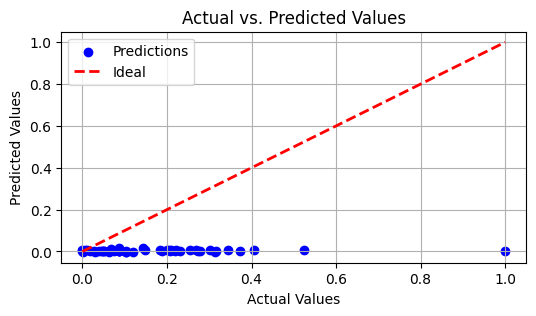

In [47]:
import numpy as np
import matplotlib.pyplot as plt

# Plotting the actual test data and predictions
plt.figure(figsize=(6,3))
plt.scatter(y_test, predictions, color='blue', label='Predictions')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', linewidth=2, label='Ideal')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.legend()
plt.grid(True)
plt.show()

#RMSE MSE plot

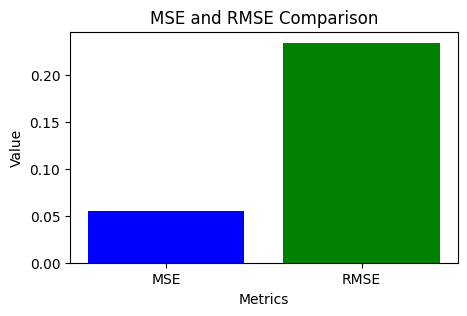

In [51]:
# Create labels and values for the bar plot
metrics = ['MSE', 'RMSE']
values = [mse, rmse]

# Plotting the bar plot
plt.figure(figsize=(5,3))
plt.bar(metrics, values, color=['blue', 'green'])
plt.xlabel('Metrics')
plt.ylabel('Value')
plt.title('MSE and RMSE Comparison')
plt.show()